<center><h2>Explainable Machine Learning 2023/2024Z</h2></center>
<center><h3>Homework 5</h3></center>

Mateusz Szymański

# Task 1

Consider a following model:

$$f(x_1,x_2) = \left(x_1 + x_2\right)^2$$

with $x_1,x_2$ following the uniform distribution on $[-1,1]$, that is $x_1,x_2\sim U\left([-1,1]\right)$. We assume a total dependency $x_2$ on $x_1$, that is $x_2=x_1$.

We are going to calculate _Partial Dependence Profile_ for $x_1$. The Partial Dependence Profile for this case is defined as:

$$g^{x_1}_{\textrm{PD}}(z)=E_{\underline{X}^{-x_1}}\left[f\left(X^{x_1=z}\right)\right]$$

where $z\in [-1,1]$ and $\underline{X}^{-x_1}=x_2$ is the marginal distribution of $X=[x_1,x_2]$ without $x_1$.

## Partial Dependence Profile

To calculate PDP of the model, for $x_1$, let us fix $z\in [-1,1]$. Then:

$$g^{x_1}_{\textrm{PD}}(z)=E_{\underline{X}^{-x_1}}\left[f\left(X^{x_1=z}\right)\right]=E_{x_2}\left[f\left(X^{x_1=z}\right)\right]=E_{x_2}\left[\left(z + x_2\right)^2\right]$$

Since $x_2\sim U\left([-1,1]\right)$, we need to find the average value of $(x + z)^2$ over $[-1,1]$:

$$E_{x_2}\left[\left(z + x_2\right)^2\right]=\frac{1}{\left|\left[-1,1\right]\right|}\int_{-1}^{1}(z+x_2)^2\mbox{d}x_2=z^2+\frac{1}{3}$$

The result agrees with `dalex` package:

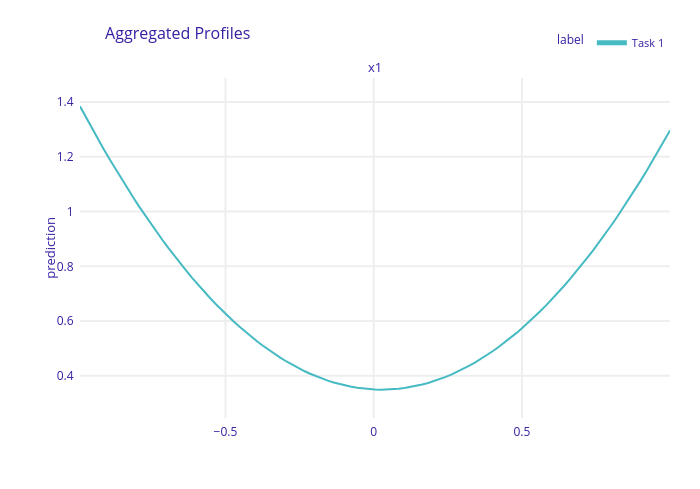</img>

## Marginal Effect

To calculate _Marginal Effects_ we calculate a similar expression, but this time the marginal distribution is conditioned by $x_1=z$:

$$g^{x_1}_{\textrm{ME}}(z)=E_{\underline{X}^{-x_1|x_1=z}}\left[f\left(X^{x_1=z}\right)\right]$$

Let us notice that $x_2$ is completely determined by $z$, that is $x_2=z$ and therefore:

$$g^{x_1}_{\textrm{ME}}(z)=E_{x_2|x_1=z}\left[\left(z + x_2\right)^2\right] = (2z)^2 = 4z^2$$

However, this time the `dalex` package disagrees on that result: it is more like $2.45x^2+0.2$.

This may be due to the difficulty in estimating the conditional distribution, but this is only a hypothesis and would require deeper examination of the ML algorithm.

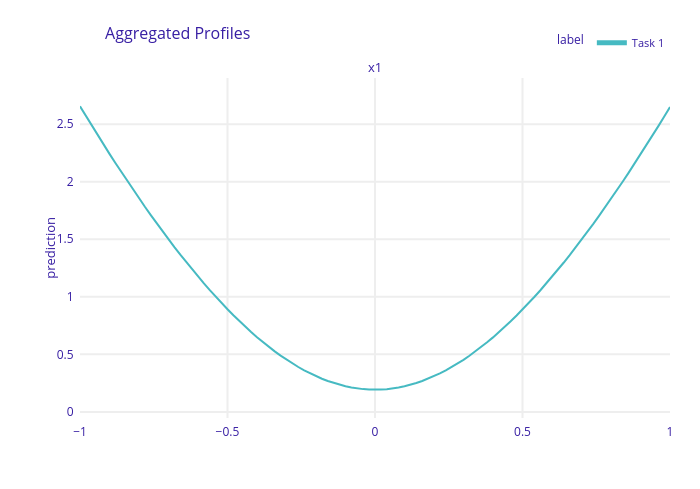</img>

## Accumulated Local Effects

The _Accumulated Local Effects_ is defined as:

$$g^{x_1}_{\textrm{ALE}}(z)=\int_{z_0}^z \left[E_{\underline{X}^{-x_1|x_1=v}}\frac{\partial f(x_1, x_2)}{\partial x_1}\bigg|_{x_1=v}\right]\mbox{d}v$$

In order to calculate this expression, we need to evaluate $\frac{\partial f(x_1, x_2)}{\partial x_1}$:

$$\frac{\partial f(x_1, x_2)}{\partial x_1}=\frac{\partial}{\partial x_1}\left(x_1+x_2\right)^2=2(x_1+x_2)$$

Hence, as $\underline{X}^{-x_1|x_1=v} = \left(x_2|{x_1=v}\right)$:

$$g^{x_1}_{\textrm{ALE}}(z)=\int_{z_0}^z \left[E_{\underline{X}^{-x_1|x_1=v}}2(x_1+x_2)|_{x_1=v}\right]\mbox{d}v=\int_{z_0}^z \left[E_{x_2|x_1=v}2(x_1+x_2)|_{x_1=v}\right]\mbox{d}v$$

Again, $x_2=x_1=v$ and the expected value is being equal to:

$$g^{x_1}_{\textrm{ALE}}(z)=\int_{z_0}^z \left[E_{\underline{X}^{-x_1|x_1=v}}2(x_1+x_2)|_{x_1=v}\right]\mbox{d}v=\int_{z_0}^z \left[E_{\underline{X}^{-x_1|x_1=v}}2(v+x_2)\right]\mbox{d}v=\int_{z_0}^z 2(v+v)\mbox{d}v$$

Finally, for $z_0=-1$:

$$g^{x_1}_{\textrm{ALE}}(z)=\int_{z_0}^z 2(v+v)\mbox{d}v=4\int_{z_0}^z v\mbox{d}v=2\left(z^2-z_0^2\right)=2z^2-2$$

## Conclusion

We see that all results are different. The PDP ignored complete dependence $x_2$ on $x_1$, while Marginal Effects took that dependence into account. 

Accumulated Local Effects turned out to be negative. It describes rather how the CP profile for the chosen variable changes at a certain point.

# Task 2

The goal of this task is to calculate all mentioned earlier profiles for given dataset and a model of choice. As in previous homeworks, we are going to use `phoneme.csv` dataset. We skip the details of the dataset.

Once again, the model of choice is the random forest classifier. 

Let us use the same observations as in the previous homework.

## Ceteris Paribus

As we know from the previous homeworks, `V4` column matters the most. We are going to examine _Ceteris Paribus_ profiles for all variables. 

Let us implement Ceteris Paribus. For that part, for given observation and a fixed column, we need to artificially create some samples. As the data has been normalized earlier, we may assume that each variable follows the unit normal distribution, that is $x\sim\mathcal{N}(0,1)$.

We focus on two observations:

|          |    V1 |    V2 |    V3 |    V4 |    V5 |   TARGET |
|---------:|------:|------:|------:|------:|------:|---------:|
| **4505** | -0.35 | -0.06 |  1.55 | -1.22 | -0.54 |     0.00 |
| **4948** |  0.11 |  0.50 | -0.20 |  0.29 | -0.48 |     1.00 |

|4505|4948|
|:--:|:--:|
| 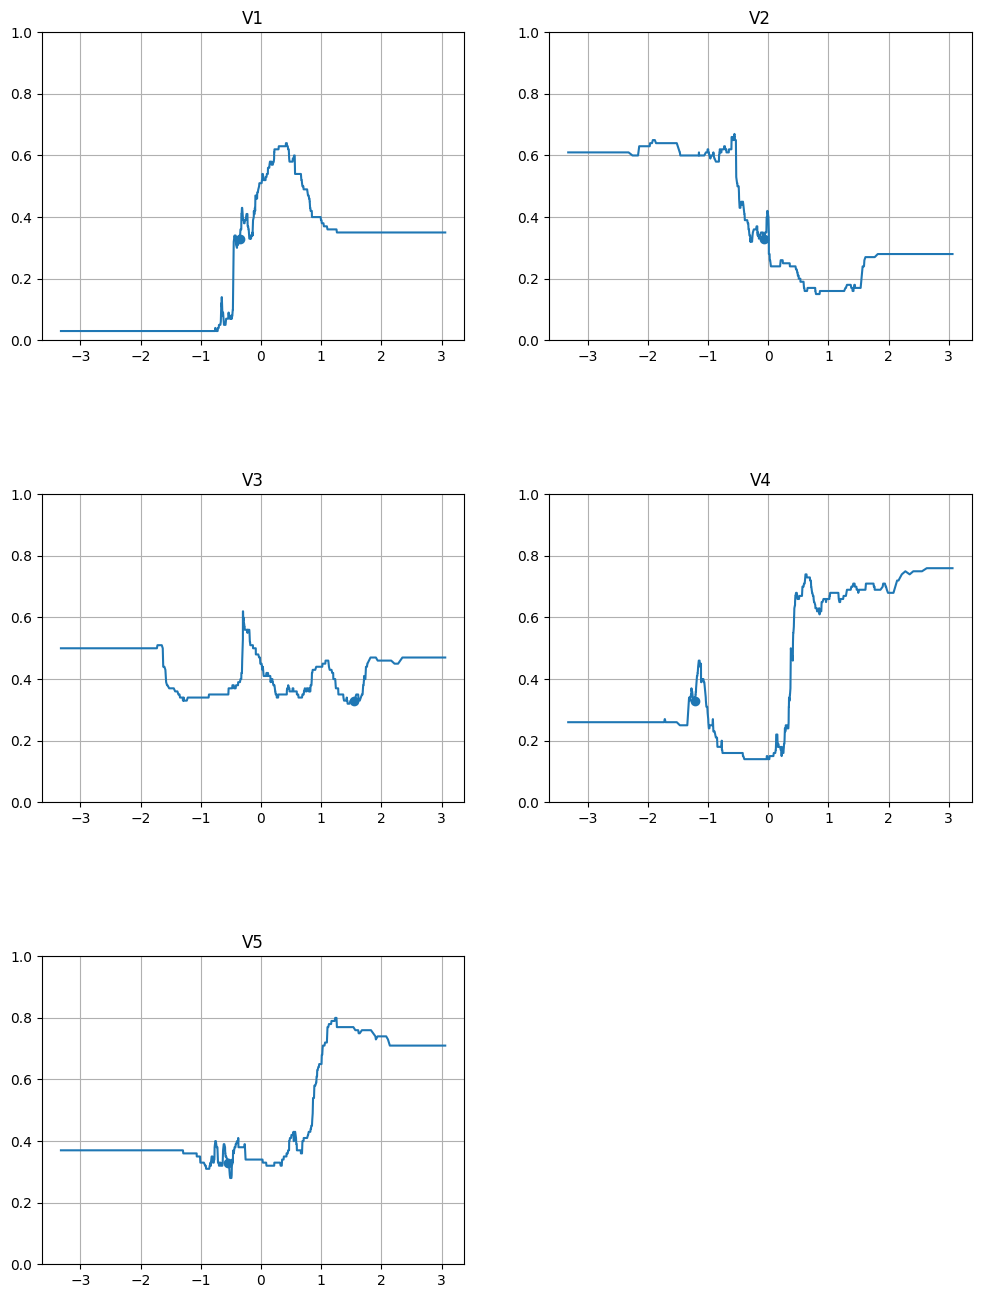</img> | 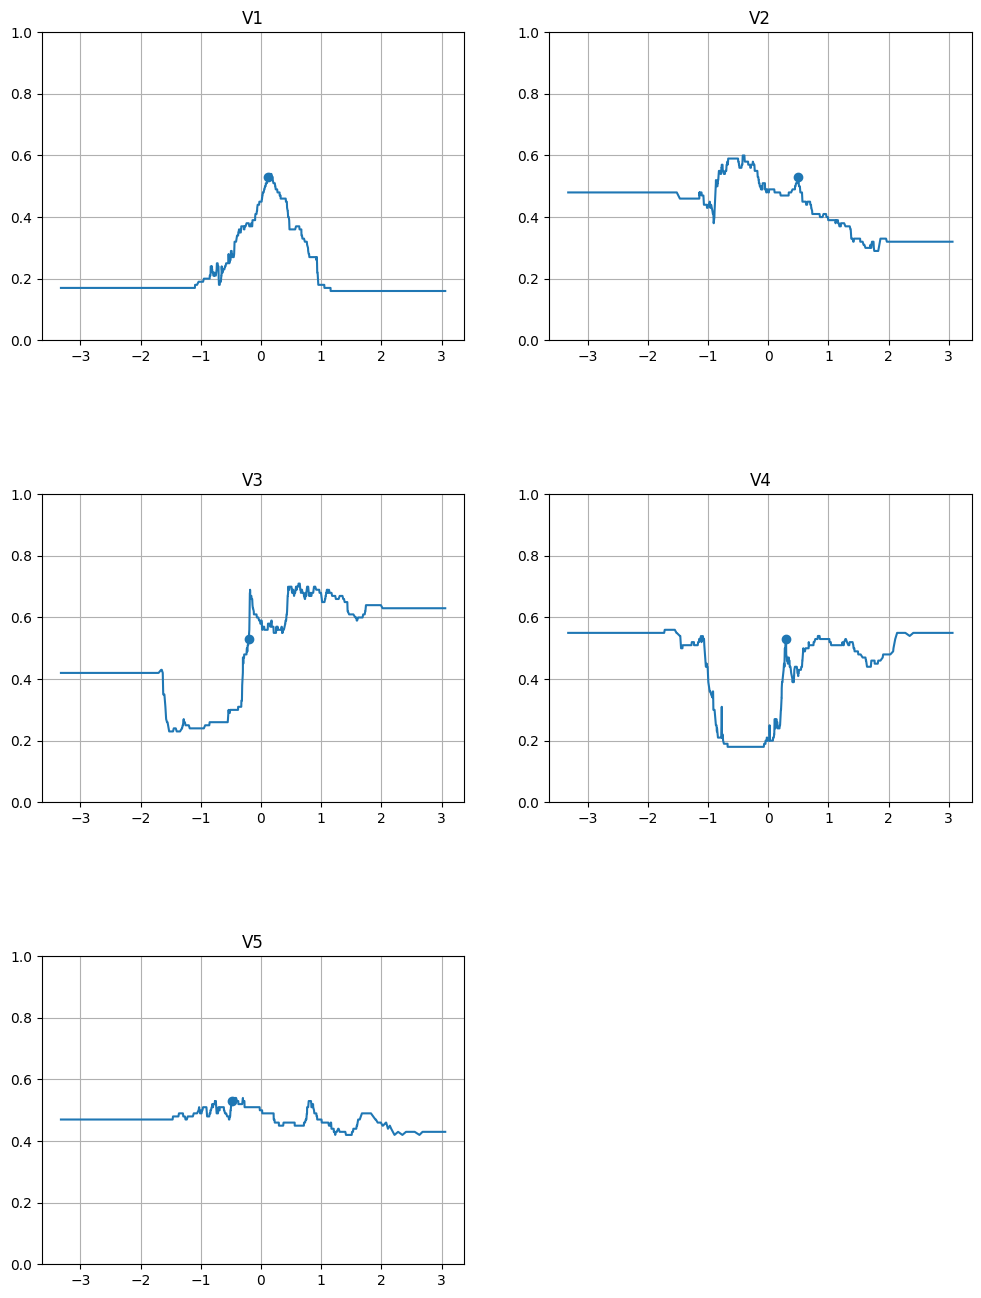</img> |

The result we obtained agrees with `dalex` package.

| 4504 | 4948 |
|:----:|:----:|
| 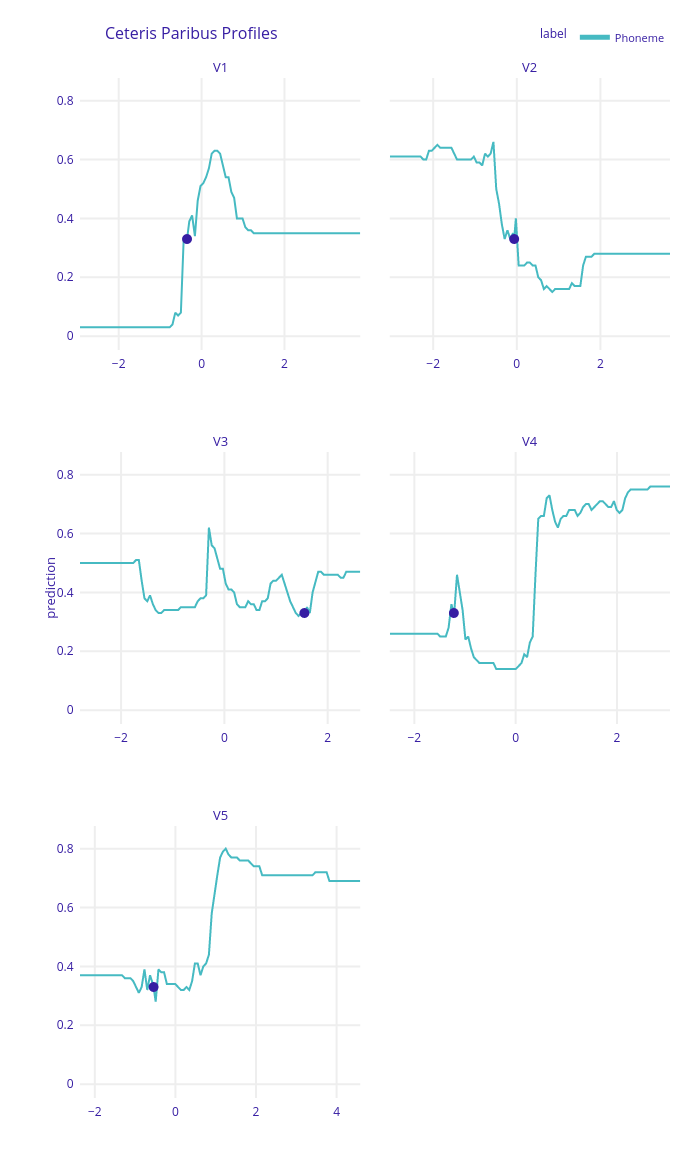</img> | 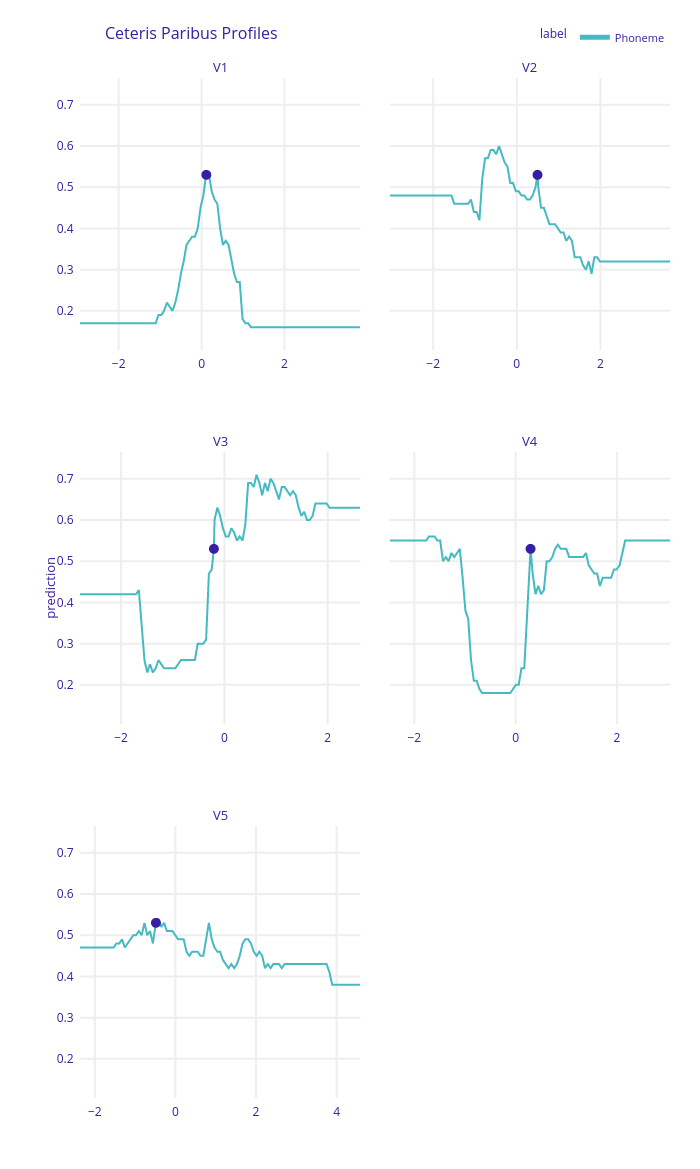</img> |

These profiles are different, especially for `V1` and `V5`. On the other hand `V2` and `V4` remain pretty similar.

Let us find observations such that their profiles diverge even more. To obtain that, we are going to find two observations that have a value of one variable relatively close to each other and of a different slope.

For that part, we have chosen the `V2` variable (as not the strongest one and not the weakest) and calculated CP profiles for all observations that have `V2` lying in the region $\left(-\tfrac{1}{2},\tfrac{1}{2}\right)$. Then, we have sorted slope coefficients, that is linear regression model coefficients fitted to the whole CP profile, for each observation. 

Finally, we have chosen two observations: of the minimal and the maximal slope.

We obtained two observations of different classes:

|          |    V1 |    V2 |    V3 |   V4 |    V5 |   TARGET |
|---------:|------:|------:|------:|-----:|------:|---------:|
| **2321** | -0.65 | -0.32 | -0.15 | 0.42 |  1.37 |     1.00 |
| **1901** | -0.40 | -0.26 |  1.08 | 1.23 | -0.95 |     0.00 |

with the following `V2` CP profiles:

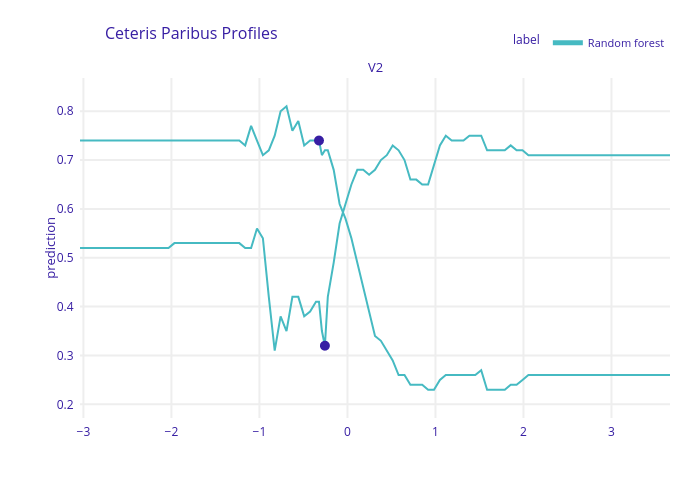</img>

It is evident for that two observations an increase of `V2` variable will lead to different predictions. But we may ask the question: is it really the case? Is that phenomenon backed up by data?

For each observation we have chosen similar rows, based on Euclidean distance between other variables. We have set the distance threshold to $0.2$. As the data is normalized, this approach is justified (variable scales are uniform).

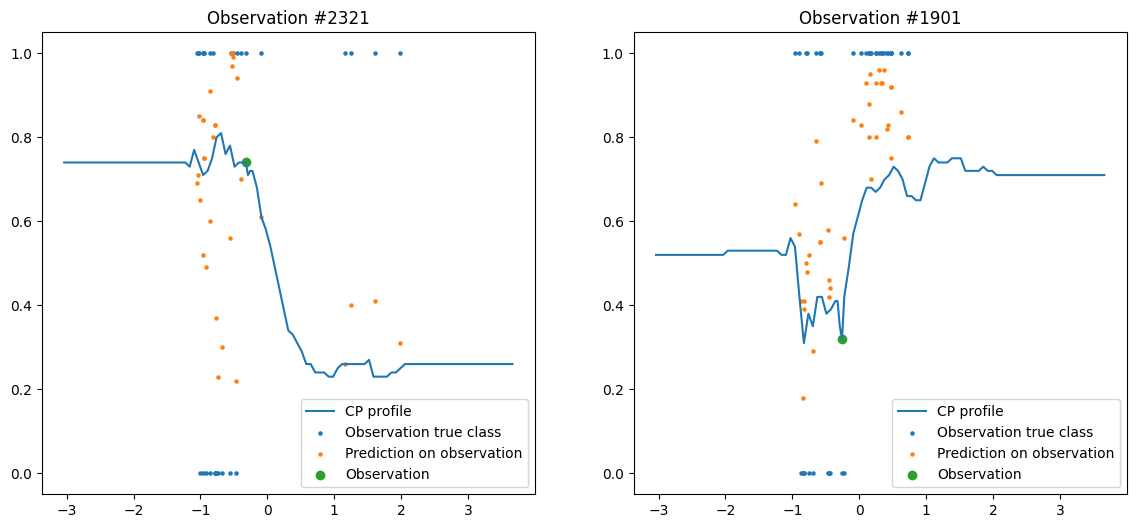</img>

The first case shows that model misclassifies the observations for higher `V2` values in the neighborhood of the observation. This shows that the CP profile does not get along with the data. Let us notice that the true classes behave chaotic in the neighborhood of the observation, similarly the model predictions.

The second example seems to confirm the calculated CP profile. Again, the neighborhood of the observation is quite chaotic.

## Partial-dependence profile

Let us create a Partial Dependence Profile for `V2`. We are going to implement our method for estimating PDP:
* sample $N$ observation from the dataset
* sample $n$ values from the target variable $x_j$

For each sampled value $z$ from the target variable, use $N$ sample observation but reassign the target variable to $z$. Then, we obtained $\underline{x}_{i}^{|j=z}$. The estimation $g_{\textrm{PD}}(z)$ is then

$$g_{\textrm{PD}}(z)=\frac{1}{N}\sum_{i=1}^N f\left(\underline{x}_{i}^{j|=z}\right)$$ where $f$ is `RandomForestClassifier.predict_proba`.


This image shows a comparison between PDP calculated by the method above and `dalex` package. We can see that the calculated profiles agree.

| our method | `dalex` |
|:----------:|:-------:|
| 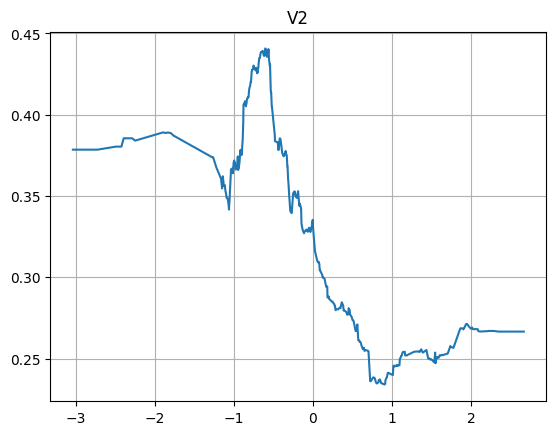</img> | 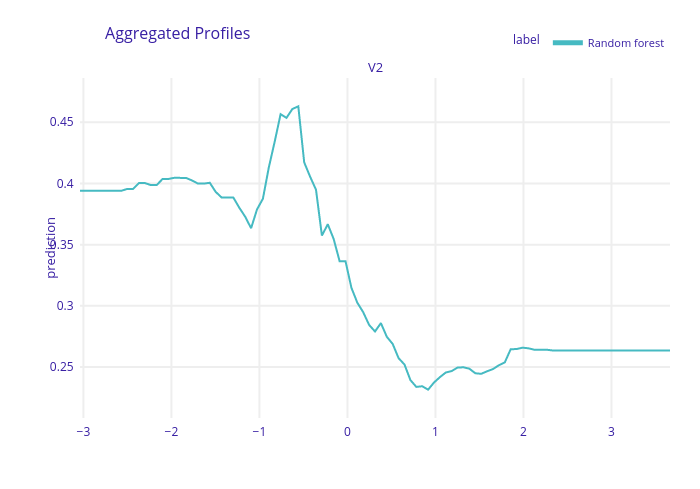</img> |

This profile resembles the first CP to some extent. In general, the more `V2` is, the higher the probability the model assigns. This is is not the case for the second observation. We need to keep in my mind that PDP ignores variables interactions (by forcing the target variable assignment).

## Model comparison

We are going to compare `V2` PDP of `RandomForestClassifier` with a similar profile for a simple logistic regression model.

| `RandomForestClassifier` | `LogisticRegression` |
|:------------------------:|:--------------------:|
| 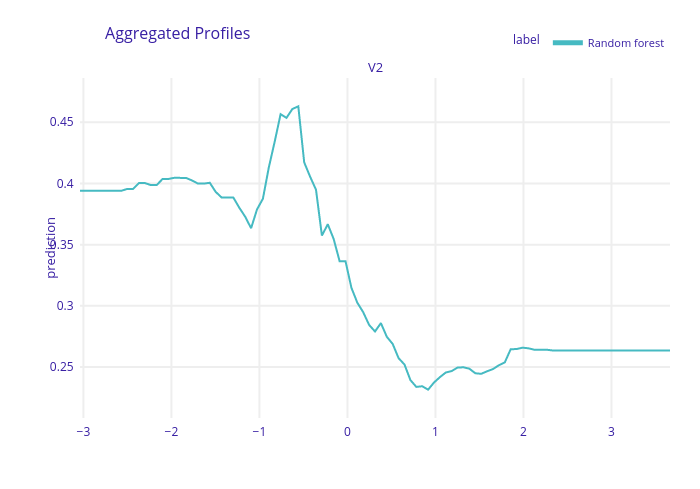</img> | 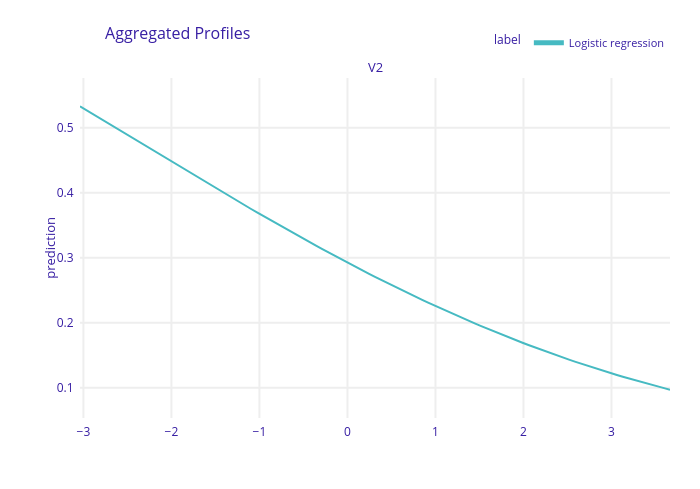</img> |

While the general trend is somehow preserved by the logistic regression model, we can see how simplistic this model is. Let us remember that `LogisticRegression` assumes independence of variables. This is clearly visible on the diagram which shows that the logistic regression model cannot handle more complex multimodal distributions.

# Appendix

## Package import

In [1]:
import random
from typing import Callable

import dalex as dx
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from plotly.io import to_image
from IPython.display import Markdown
from IPython.display import Image

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

from tqdm.notebook import tqdm

## Constants

In [2]:
RANDOM_STATE = 42
TEST_SIZE = 0.75

NUM_COLUMNS = 5
N_PDP_ESTIMATION = 500

TARGET_COLUMN = 'V2'
DISTANCE_THRESHOLD = 0.2

In [3]:
def seed(random_state=RANDOM_STATE):
    np.random.seed(random_state)
    random.seed(random_state)

In [4]:
def show_plotly_image(figure):
    image = to_image(figure)
    return Image(image)

## Task 1

In [5]:
seed()

N = 1000
x = np.random.uniform(-1, 1, N)

In [6]:
class Model:
    def predict(self, X):
        return np.sum(X, axis=1) ** 2

In [7]:
model = Model()

In [8]:
X = np.stack([x, x]).T
y = model.predict(X)
df = pd.DataFrame(np.hstack([X, np.expand_dims(y, axis=1)]), columns=['x1', 'x2', 'y'])

X = df.iloc[:, :2]
y = df.iloc[:, -1]

### `dalex` explainer

In [9]:
explainer = dx.Explainer(model, X, y, label='Task 1')

Preparation of a new explainer is initiated

  -> data              : 1000 rows 2 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 1000 values
  -> model_class       : __main__.Model (default)
  -> label             : Task 1
  -> predict function  : <function yhat_default at 0x7fce4c566520> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 3.68e-05, mean = 1.37, max = 4.0
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = 0.0, mean = 0.0, max = 0.0
  -> model_info        : package __main__

A new explainer has been created!


/home/mateusz/anaconda3/envs/ml/lib/python3.11/site-packages/dalex/_explainer/object.py:138: UserWarning:


  -> predicted values  : 'predict_function' must return numpy.ndarray (1d)



Calculating ceteris paribus: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 43.81it/s]


,_vname_,_label_,_x_,_yhat_,_ids_
0,x1,Task 1,-0.990736,1.340958,0
50,x1,Task 1,0.004350,0.358682,0
100,x1,Task 1,0.999435,1.356796,0


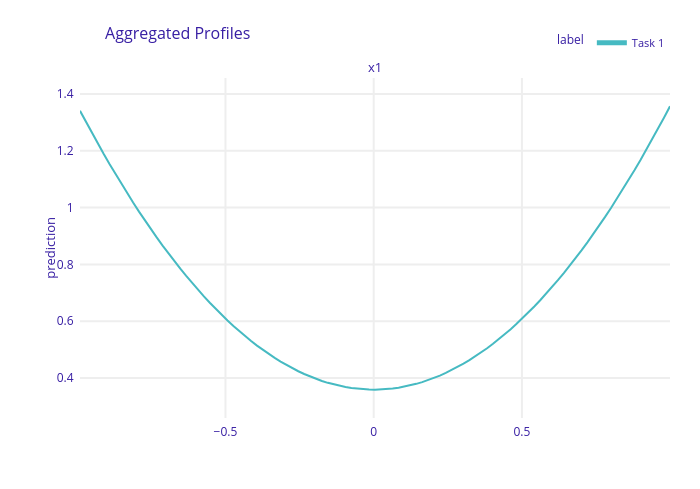

In [10]:
partial_dependence = explainer.model_profile(variables=['x1'], type='pdp')
display(partial_dependence.result[::50])
figure = partial_dependence.plot(show=False)

show_plotly_image(figure)

Calculating conditional dependency: 100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19.81it/s]


,_vname_,_label_,_x_,_yhat_,_ids_
0,x1,Task 1,-0.990736,2.662056,0
50,x1,Task 1,0.004350,0.196623,0
100,x1,Task 1,0.999435,2.663926,0


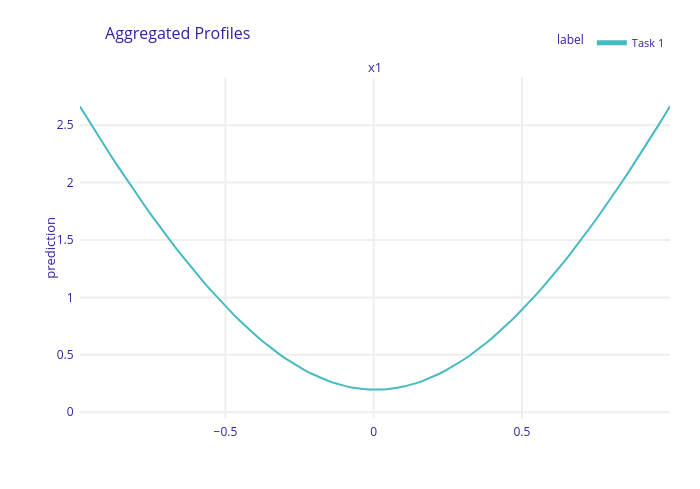

In [11]:
partial_dependence = explainer.model_profile(variables=['x1'], type='conditional', N=N)
display(partial_dependence.result.iloc[::50])
figure = partial_dependence.plot(show=False)

show_plotly_image(figure)

Calculating accumulated dependency: 100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.51it/s]


,_vname_,_label_,_x_,_yhat_,_ids_
0,x1,Task 1,-0.990736,2.449932,0
50,x1,Task 1,0.004350,0.770506,0
100,x1,Task 1,0.999435,2.445343,0


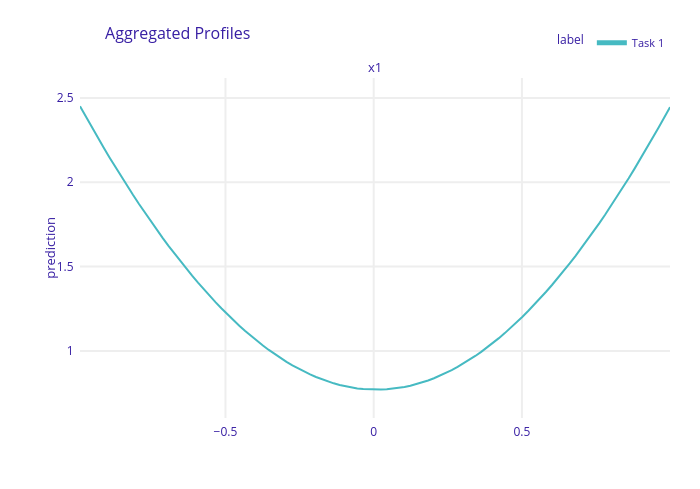

In [12]:
partial_dependence = explainer.model_profile(variables=['x1'], type='accumulated')
display(partial_dependence.result.iloc[::50])
figure = partial_dependence.plot(show=False)

show_plotly_image(figure)

## Task 2

In [13]:
df = pd.read_csv('datasets/phoneme.csv').iloc[:, 1:]
df['TARGET'] = df['TARGET'] - 1  # we shift the values as originally they are from the set {1, 2} instead of {1, 2}
X = df.iloc[:, :-1]
y = df.iloc[:, -1].to_numpy()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

In [15]:
random_forest = RandomForestClassifier(random_state=RANDOM_STATE)
random_forest.fit(X_train, y_train)
print('Test accuracy: {:.2f}%.'.format(100 * random_forest.score(X_test, y_test)))

Test accuracy: 87.02%.


### CP profiles

In [16]:
indices = [4505, 4948]

In [17]:
normal = np.sort(np.random.normal(0, 1, N))

,V1,V2,V3,V4,V5,TARGET
4505,-0.351143,-0.062835,1.549588,-1.219647,-0.541349,0.0


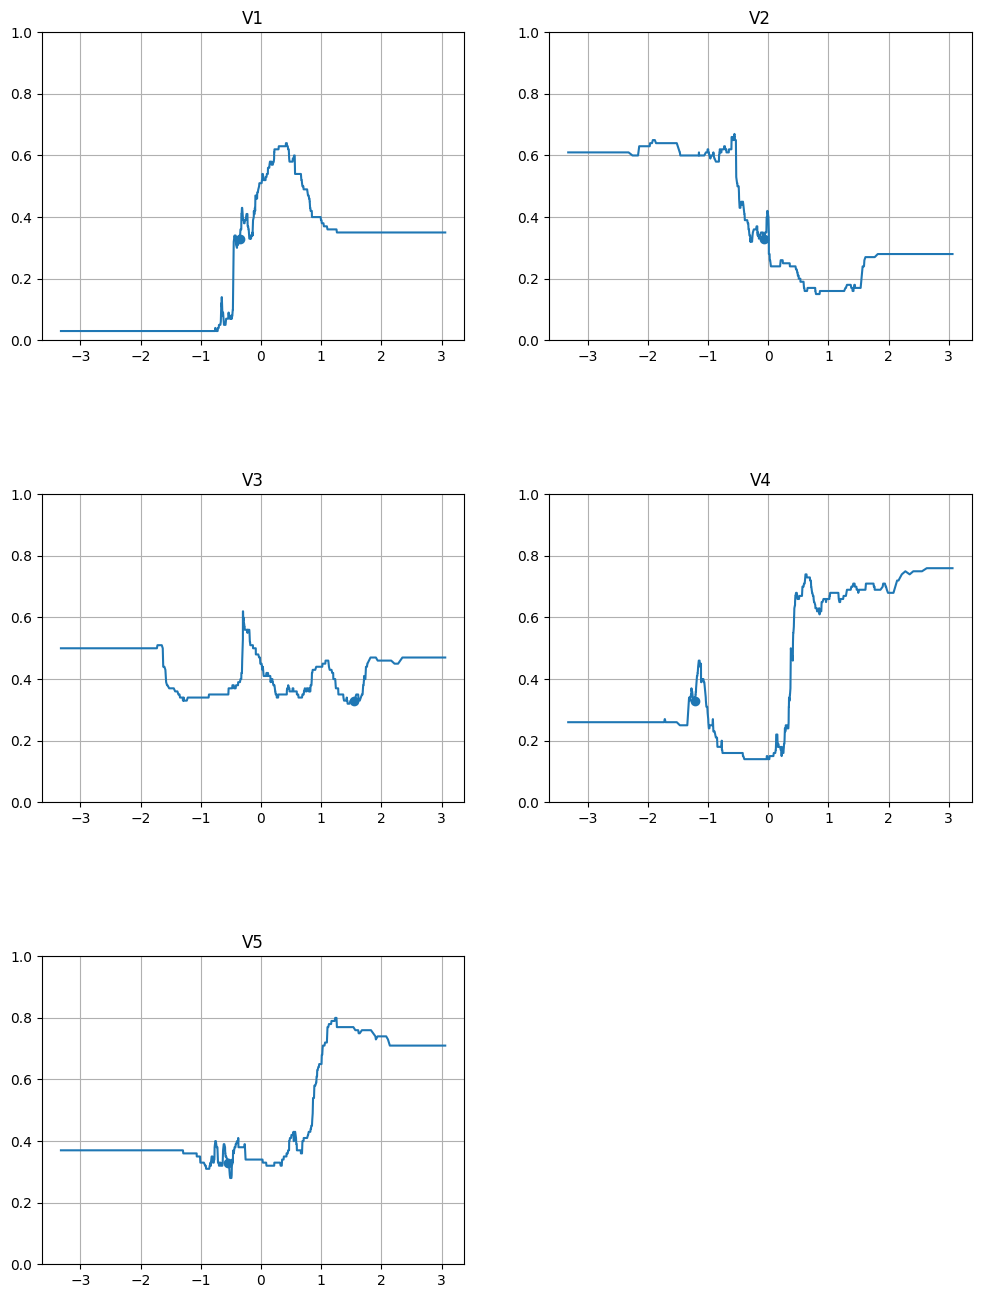

,V1,V2,V3,V4,V5,TARGET
4948,0.114717,0.4954,-0.203104,0.294597,-0.483366,1.0


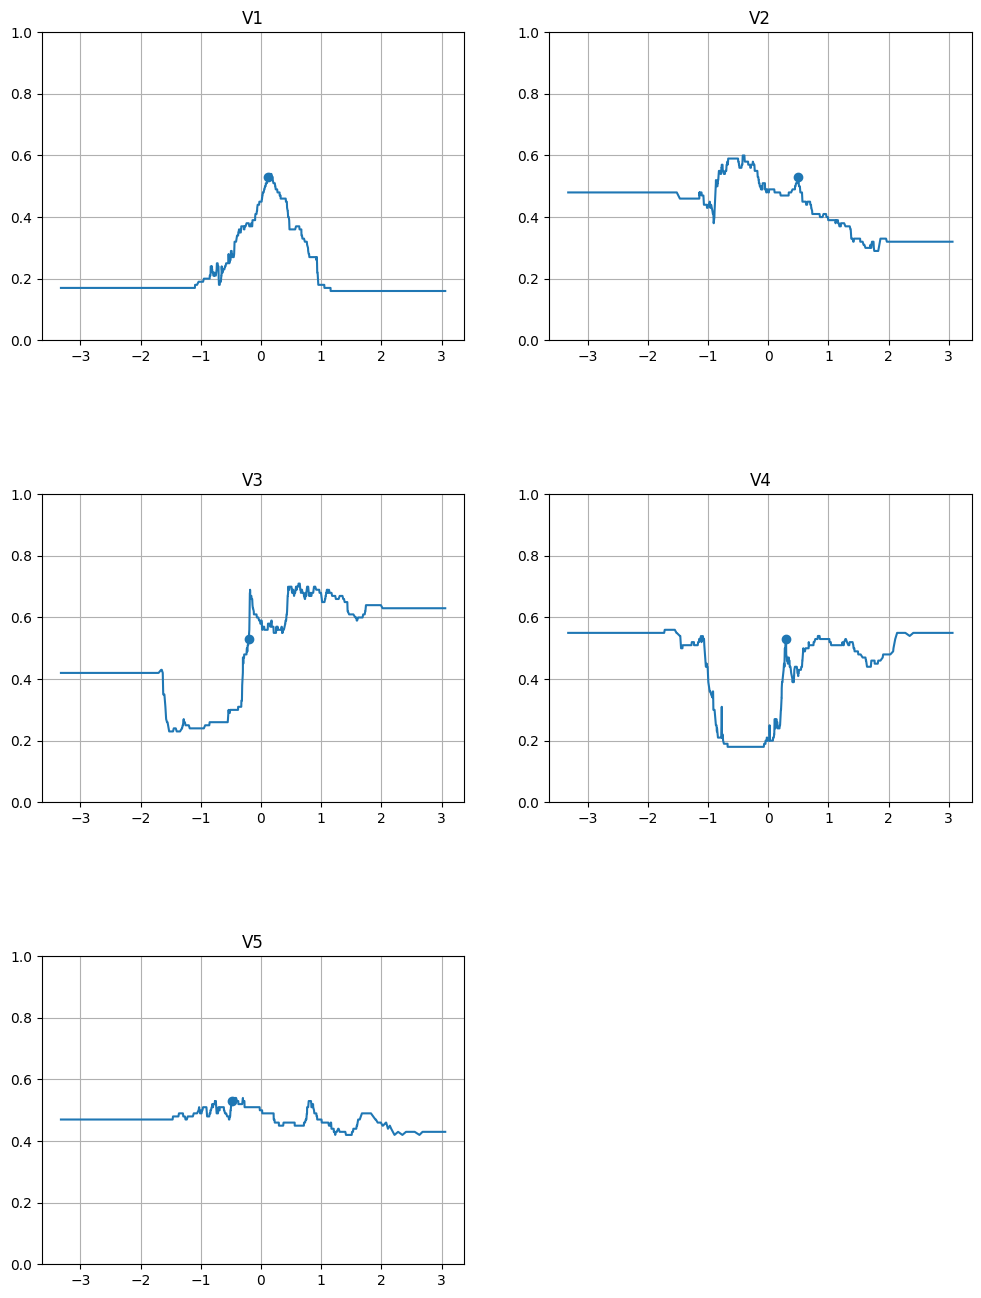

In [18]:
for index in indices:
    observation = df.iloc[index]
    df_observation = pd.DataFrame([observation.iloc[:NUM_COLUMNS]])

    display(pd.DataFrame([observation]))
    fig, axes = plt.subplots(3, 2, figsize=(12, 16))
    for idx, column in enumerate(['V1', 'V2', 'V3', 'V4', 'V5']):
        df_cp = pd.DataFrame([observation] * 1000).reset_index(drop=True)
        df_cp[column] = normal

        X_ = df_cp.iloc[:, :NUM_COLUMNS]
        y_ = random_forest.predict_proba(X_)[:, 1]

        y_pred = random_forest.predict_proba(df_observation)[:, 1]

        ax = axes[idx // 2, idx % 2]
        ax.plot(X_[column], y_)
        ax.set_ylim([0, 1])
        ax.set_title(column)
        ax.xaxis.grid(True)
        ax.yaxis.grid(True)
        ax.plot(observation[column], y_pred, 'o', c='C0')

    axes[2, 1].axis('off')
    plt.subplots_adjust(hspace=0.5)
    plt.show()

### `dalex` CP profiles

In [19]:
explainer = dx.Explainer(random_forest, X, y, label='Random forest')

Preparation of a new explainer is initiated

  -> data              : 5404 rows 5 cols
  -> target variable   : 5404 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Random forest
  -> predict function  : <function yhat_proba_default at 0x7fce4c5663e0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.307, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.98, mean = -0.014, max = 1.0
  -> model_info        : package sklearn

A new explainer has been created!


/home/mateusz/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



,V1,V2,V3,V4,V5
4505,-0.351143,-0.062835,1.549588,-1.219647,-0.541349


Calculating ceteris paribus: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 37.13it/s]


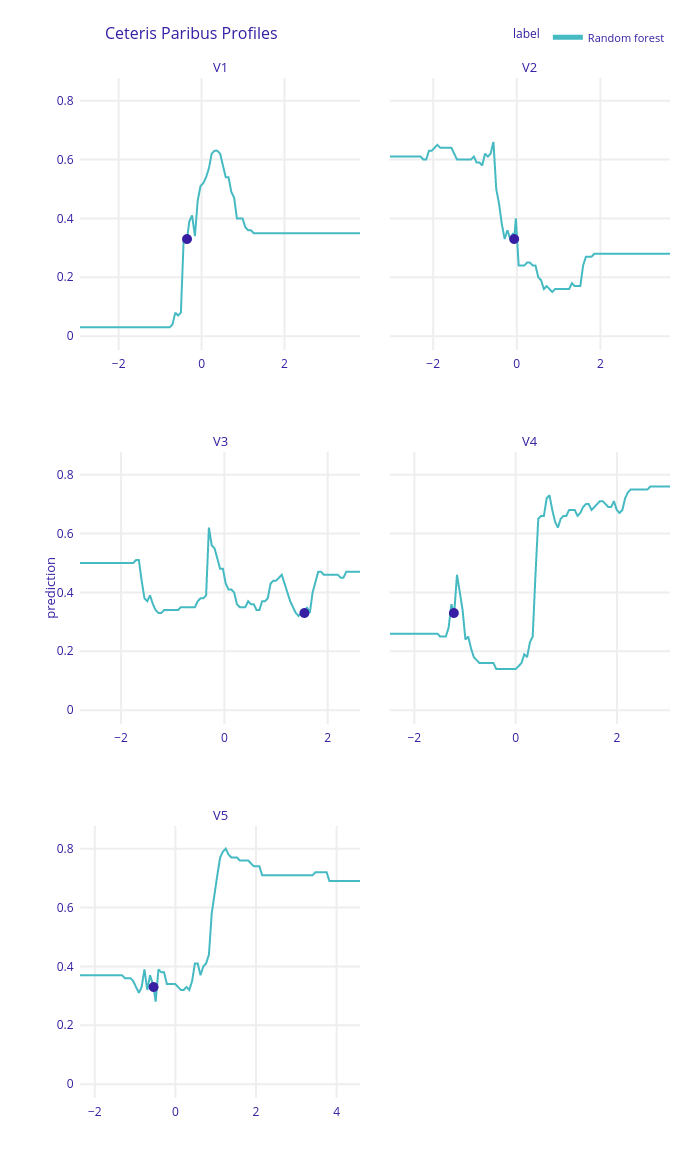

,V1,V2,V3,V4,V5
4948,0.114717,0.4954,-0.203104,0.294597,-0.483366


Calculating ceteris paribus: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 36.90it/s]


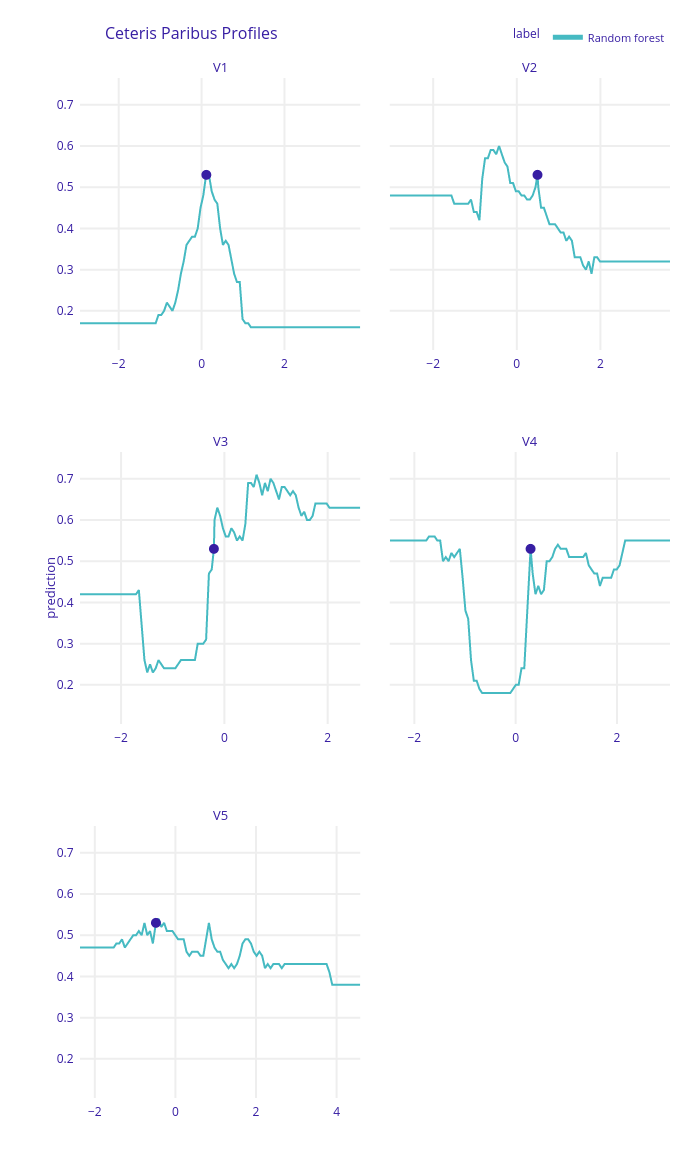

In [20]:
df_observations = df.loc[indices].iloc[:, :NUM_COLUMNS]
for i, observation in df_observations.iterrows():
    display(pd.DataFrame([observation]))
    cp = explainer.predict_profile(observation)
    figure = cp.plot(show=False)
    display(show_plotly_image(figure))

### Divergent profiles

In [21]:
df_zero = df[np.abs(df[TARGET_COLUMN]) < 0.5]
positive = df_zero[df_zero['TARGET'] == 1]
negative = df_zero[df_zero['TARGET'] == 0]

In [22]:
result = explainer.predict_profile(df_zero.iloc[:, :NUM_COLUMNS]).result
result_v = result[result['_vname_'] == TARGET_COLUMN]

Calculating ceteris paribus: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:55<00:00, 11.08s/it]


In [23]:
groups = result_v[[TARGET_COLUMN, '_ids_', '_yhat_']].groupby('_ids_')

coefficients = {}
for ids in tqdm(sorted(result_v['_ids_'].unique())):
    group = groups.get_group(ids).sort_values(TARGET_COLUMN)
    linear_regression = LinearRegression()
    linear_regression.fit(group[[TARGET_COLUMN]], group['_yhat_'])
    coefficient = linear_regression.coef_[0]
    coefficients[ids] = coefficient

coefficients = sorted(coefficients.items(), key=lambda x: x[1])
cp_indices = [coefficients[0][0], coefficients[-1][0]]
id1, id2 = cp_indices

  0%|          | 0/1686 [00:00<?, ?it/s]

In [24]:
id1, id2 = cp_indices
print(f'Observations with extreme CP profiles: {id1}, {id2}.')
df.loc[cp_indices].to_markdown(floatfmt='.2f')

Observations with extreme CP profiles: 2321, 1901.


'|      |    V1 |    V2 |    V3 |   V4 |    V5 |   TARGET |\n|-----:|------:|------:|------:|-----:|------:|---------:|\n| 2321 | -0.65 | -0.32 | -0.15 | 0.42 |  1.37 |     1.00 |\n| 1901 | -0.40 | -0.26 |  1.08 | 1.23 | -0.95 |     0.00 |'

Calculating ceteris paribus: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.21it/s]


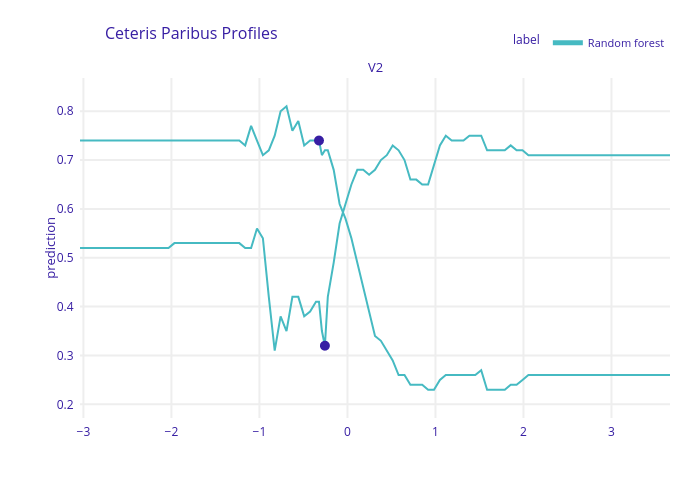

In [25]:
cp_comparison = explainer.predict_profile(
    df.iloc[cp_indices, :NUM_COLUMNS], variables=[TARGET_COLUMN]
)

figure = cp_comparison.plot(show=False)
show_plotly_image(figure)

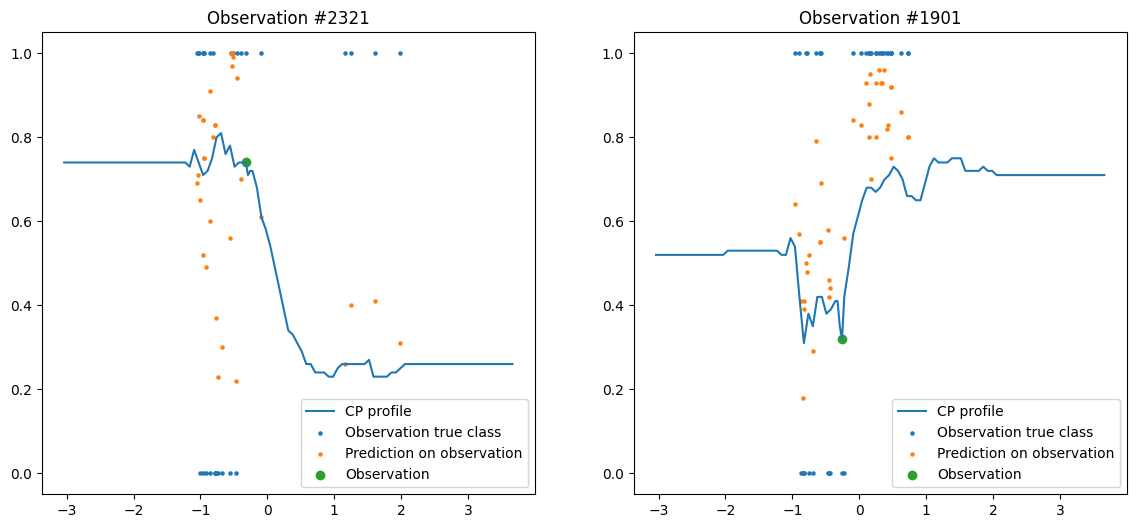

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
for i, idx in enumerate(cp_indices):
    ax = axes[i]
    df_diff = (df - df.loc[idx]) ** 2
    df_diff[TARGET_COLUMN] = 0.0
    distance = np.sum(df_diff.iloc[:, :NUM_COLUMNS], axis=1)
    df_cp = df[distance < DISTANCE_THRESHOLD].sort_values(TARGET_COLUMN)
    cp_comparison_result = cp_comparison.result[cp_comparison.result['_ids_'] == idx]
    cp_y = random_forest.predict_proba(df_cp.iloc[:, :NUM_COLUMNS])[:, 1]

    ax.plot(cp_comparison_result.set_index(TARGET_COLUMN)['_yhat_'], label='CP profile')
    ax.scatter(df_cp[TARGET_COLUMN], df_cp['TARGET'], s=5.0, label='Observation true class')
    ax.scatter(df_cp[TARGET_COLUMN], cp_y, s=5.0, label='Prediction on observation')
    ax.scatter(df.loc[idx][TARGET_COLUMN], random_forest.predict_proba(df.iloc[[idx], :NUM_COLUMNS])[:, 1][0], label='Observation')
    ax.set_title(f'Observation #{idx}')
    ax.legend()

plt.show()

### Partial-dependence Profiles

Calculating ceteris paribus: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.68it/s]


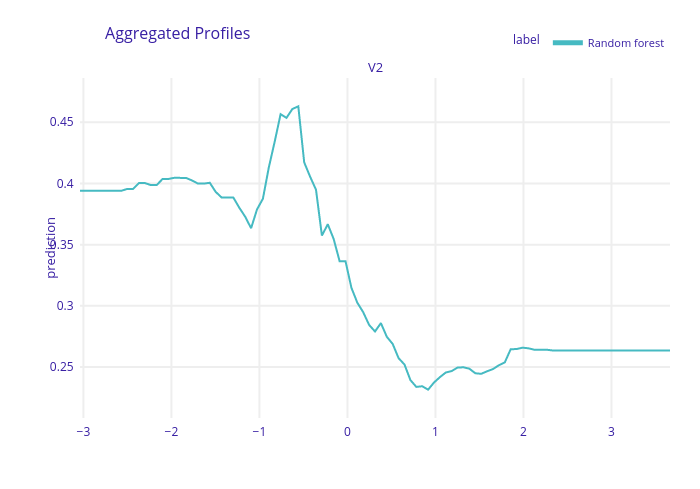

In [27]:
cp_comparison = explainer.model_profile(
    variables=[TARGET_COLUMN],
    type='pdp'
)

figure = cp_comparison.plot(show=False)
show_plotly_image(figure)

In [28]:
def calculate_partial_dependence_profile(
    predict: Callable,
    X_pdp: pd.Series,
    X_sample: pd.DataFrame,
    column: str = TARGET_COLUMN
):
    seed()
    Y_pdp = []
    for x in tqdm(X_pdp):
        X_sample[column] = x
        y_pdp = np.mean(predict(X_sample))
        Y_pdp.append(y_pdp)

    return Y_pdp

In [29]:
seed()
X_pdp = sorted(df[TARGET_COLUMN].sample(N_PDP_ESTIMATION))
X_sample = df.iloc[:, :NUM_COLUMNS].sample(N)
Y_pdp = calculate_partial_dependence_profile(
    lambda x: random_forest.predict_proba(x)[:, 1],
    X_pdp,
    X_sample,
    TARGET_COLUMN
)

  0%|          | 0/500 [00:00<?, ?it/s]

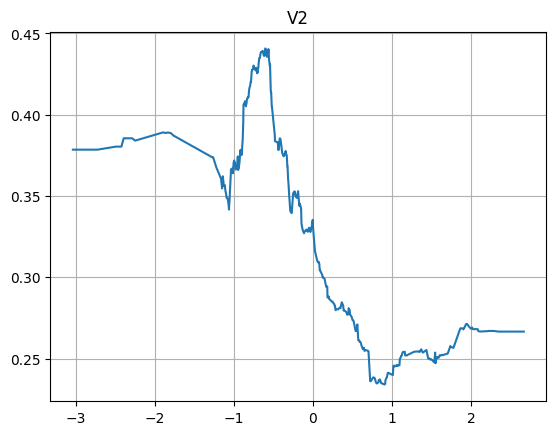

In [30]:
plt.figure()
plt.plot(X_pdp, Y_pdp)
plt.title(TARGET_COLUMN)
plt.grid()
plt.show()

### Model comparison

In [31]:
logistic_regression = LogisticRegression(random_state=RANDOM_STATE)
logistic_regression.fit(X_train, y_train)
print('Test accuracy: {:.2f}%.'.format(100 * logistic_regression.score(X_test, y_test)))

Test accuracy: 76.56%.


In [32]:
lr_explainer = dx.Explainer(logistic_regression, X, y, label='Logistic regression')
lr_result = lr_explainer.model_profile(
    variables=[TARGET_COLUMN],
    type='pdp'
)

/home/mateusz/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



Preparation of a new explainer is initiated

  -> data              : 5404 rows 5 cols
  -> target variable   : 5404 values
  -> model_class       : sklearn.linear_model._logistic.LogisticRegression (default)
  -> label             : Logistic regression
  -> predict function  : <function yhat_proba_default at 0x7fce4c5663e0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0126, mean = 0.306, max = 0.876
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.876, mean = -0.0122, max = 0.978
  -> model_info        : package sklearn

A new explainer has been created!


Calculating ceteris paribus: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 59.23it/s]


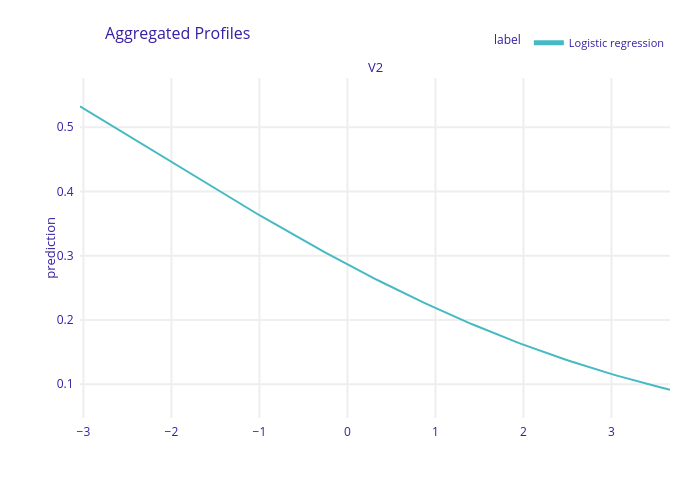

In [33]:
figure = lr_result.plot(show=False)
show_plotly_image(figure)